In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Upload dataset (for Google Colab)
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("CleanedSoilDataset_With_RefinedSoilQuality.csv")

# Prepare features and target
X = df.drop(columns=["Soil_Quality"])
y = df["Soil_Quality"]

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define updated MLP model with an additional hidden layer
updated_mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),  # New hidden layer added
    Dropout(0.2),  # Added dropout for regularization
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile updated model
updated_mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train updated model
history_updated = updated_mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate updated model
test_loss_updated, test_acc_updated = updated_mlp_model.evaluate(X_test_scaled, y_test)
print(f"Updated Model Test Accuracy: {test_acc_updated:.4f}")


Saving CleanedSoilDataset_With_RefinedSoilQuality.csv to CleanedSoilDataset_With_RefinedSoilQuality.csv
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4632 - loss: 1.2439 - val_accuracy: 0.9097 - val_loss: 0.3700
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7581 - loss: 0.5609 - val_accuracy: 0.9144 - val_loss: 0.2629
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8126 - loss: 0.4356 - val_accuracy: 0.9334 - val_loss: 0.2254
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8435 - loss: 0.3782 - val_accuracy: 0.9278 - val_loss: 0.2089
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8547 - loss: 0.3460 - val_accuracy: 0.9479 - val_loss: 0.1791
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8683 - loss: 0.3182 - val_accuracy: 0.9510 - val_loss: 0.1552
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8862 - loss: 0.2791 - val_accuracy: 0.9494 - val_loss: 0.1402
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8972 - loss: 0.2561 - val_accuracy: 0.9581 - val_

In [ ]:
# mlp_model.save("soil_quality_model.keras")
# 0.9792

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np  # Add this line

# Get predictions
y_pred = updated_mlp_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert report to a table format
import pandas as pd

performance_df = pd.DataFrame(report).transpose()
performance_df = performance_df[['precision', 'recall', 'f1-score', 'support']]

# Compute AUC-ROC score for multi-class classification
y_test_binary = pd.get_dummies(y_test)  # One-hot encoding of y_test
auc_scores = roc_auc_score(y_test_binary, y_pred, average=None)

# Keep only class rows by selecting first 'n' rows, where n = number of classes
num_classes = len(auc_scores)  # Ensure correct alignment
performance_df = performance_df.iloc[:num_classes]  # Keep only class rows

# Assign AUC-ROC scores correctly
performance_df['AUC-ROC'] = auc_scores

# Display table
print(performance_df)



119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
           precision    recall  f1-score  support   AUC-ROC
Excellent   0.998221  0.984211  0.991166    570.0  0.999936
Fair        0.973992  0.986825  0.980366    759.0  0.999578
Good        0.977320  0.998946  0.988015    949.0  0.999878
Moderate    0.992049  0.985953  0.988992   1139.0  0.999838
Poor        0.997253  0.955263  0.975806    380.0  0.999882


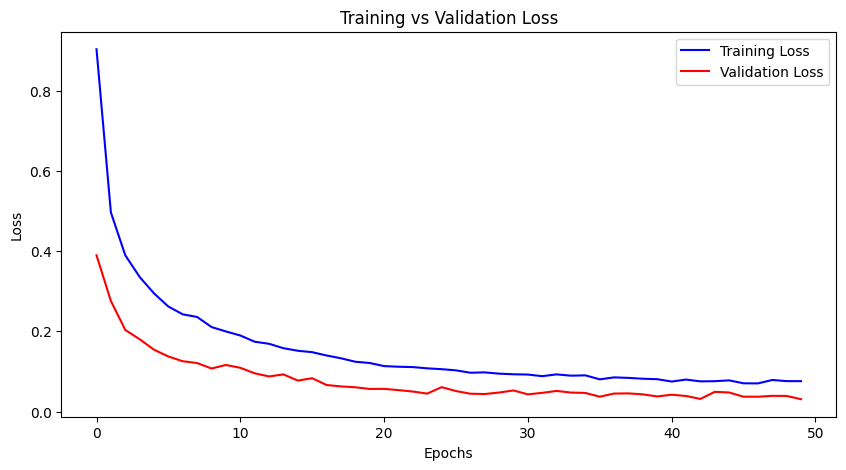

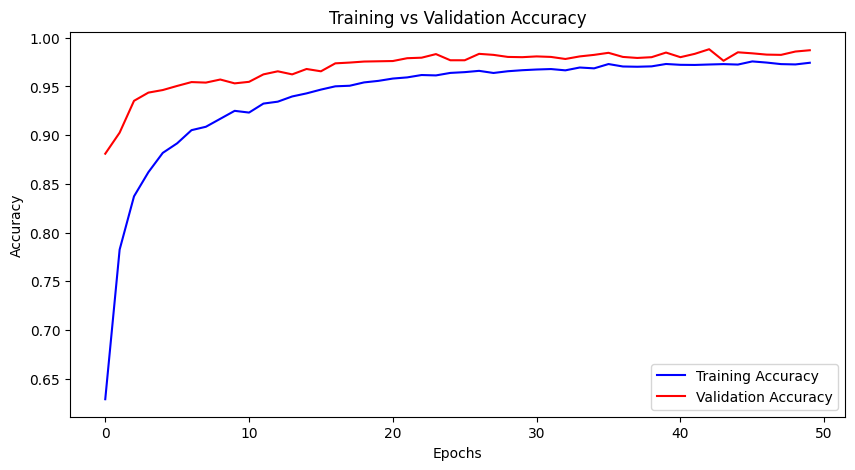

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


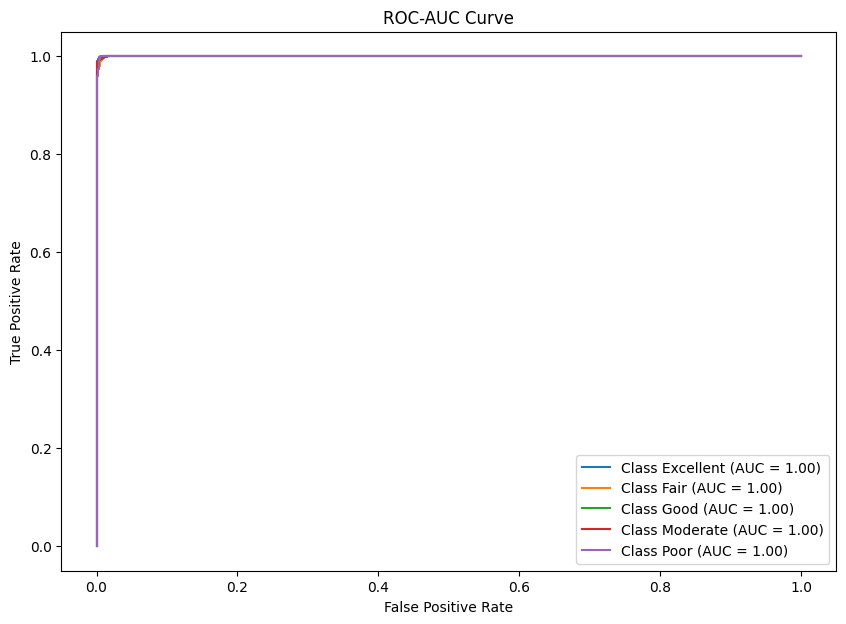

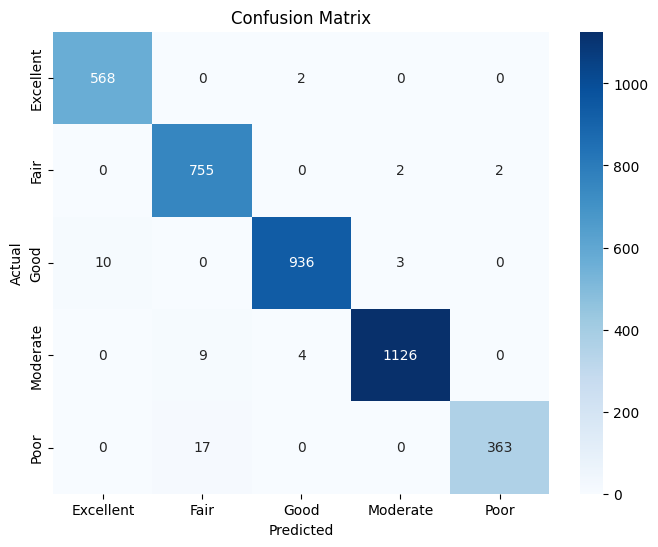

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import tensorflow as tf

# Plot Training & Validation Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history_updated.history['loss'], label='Training Loss', color='blue')
plt.plot(history_updated.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot Training & Validation Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(history_updated.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_updated.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Compute ROC-AUC Curve for Multiclass
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize labels for ROC-AUC
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Predict probabilities
y_pred_probs = updated_mlp_model.predict(X_test_scaled)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(10, 7))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

# Confusion Matrix
y_pred_classes = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


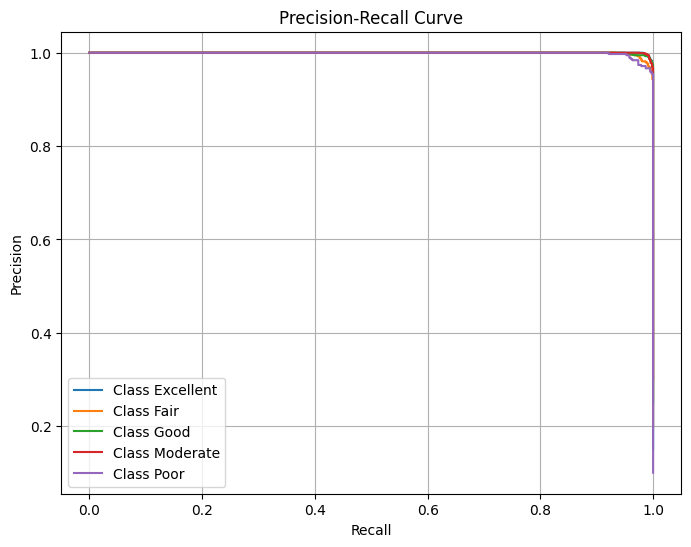

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_probs = updated_mlp_model.predict(X_test_scaled)

# Plot Precision-Recall Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_probs[:, i])
    plt.plot(recall, precision, label=f'Class {label_encoder.classes_[i]}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(updated_mlp_model, X_test_scaled, y_test, scoring="accuracy", n_repeats=10, random_state=42)

# Get feature importance scores
importances = result.importances_mean
feature_names = X.columns

# Sort feature importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for MLP Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

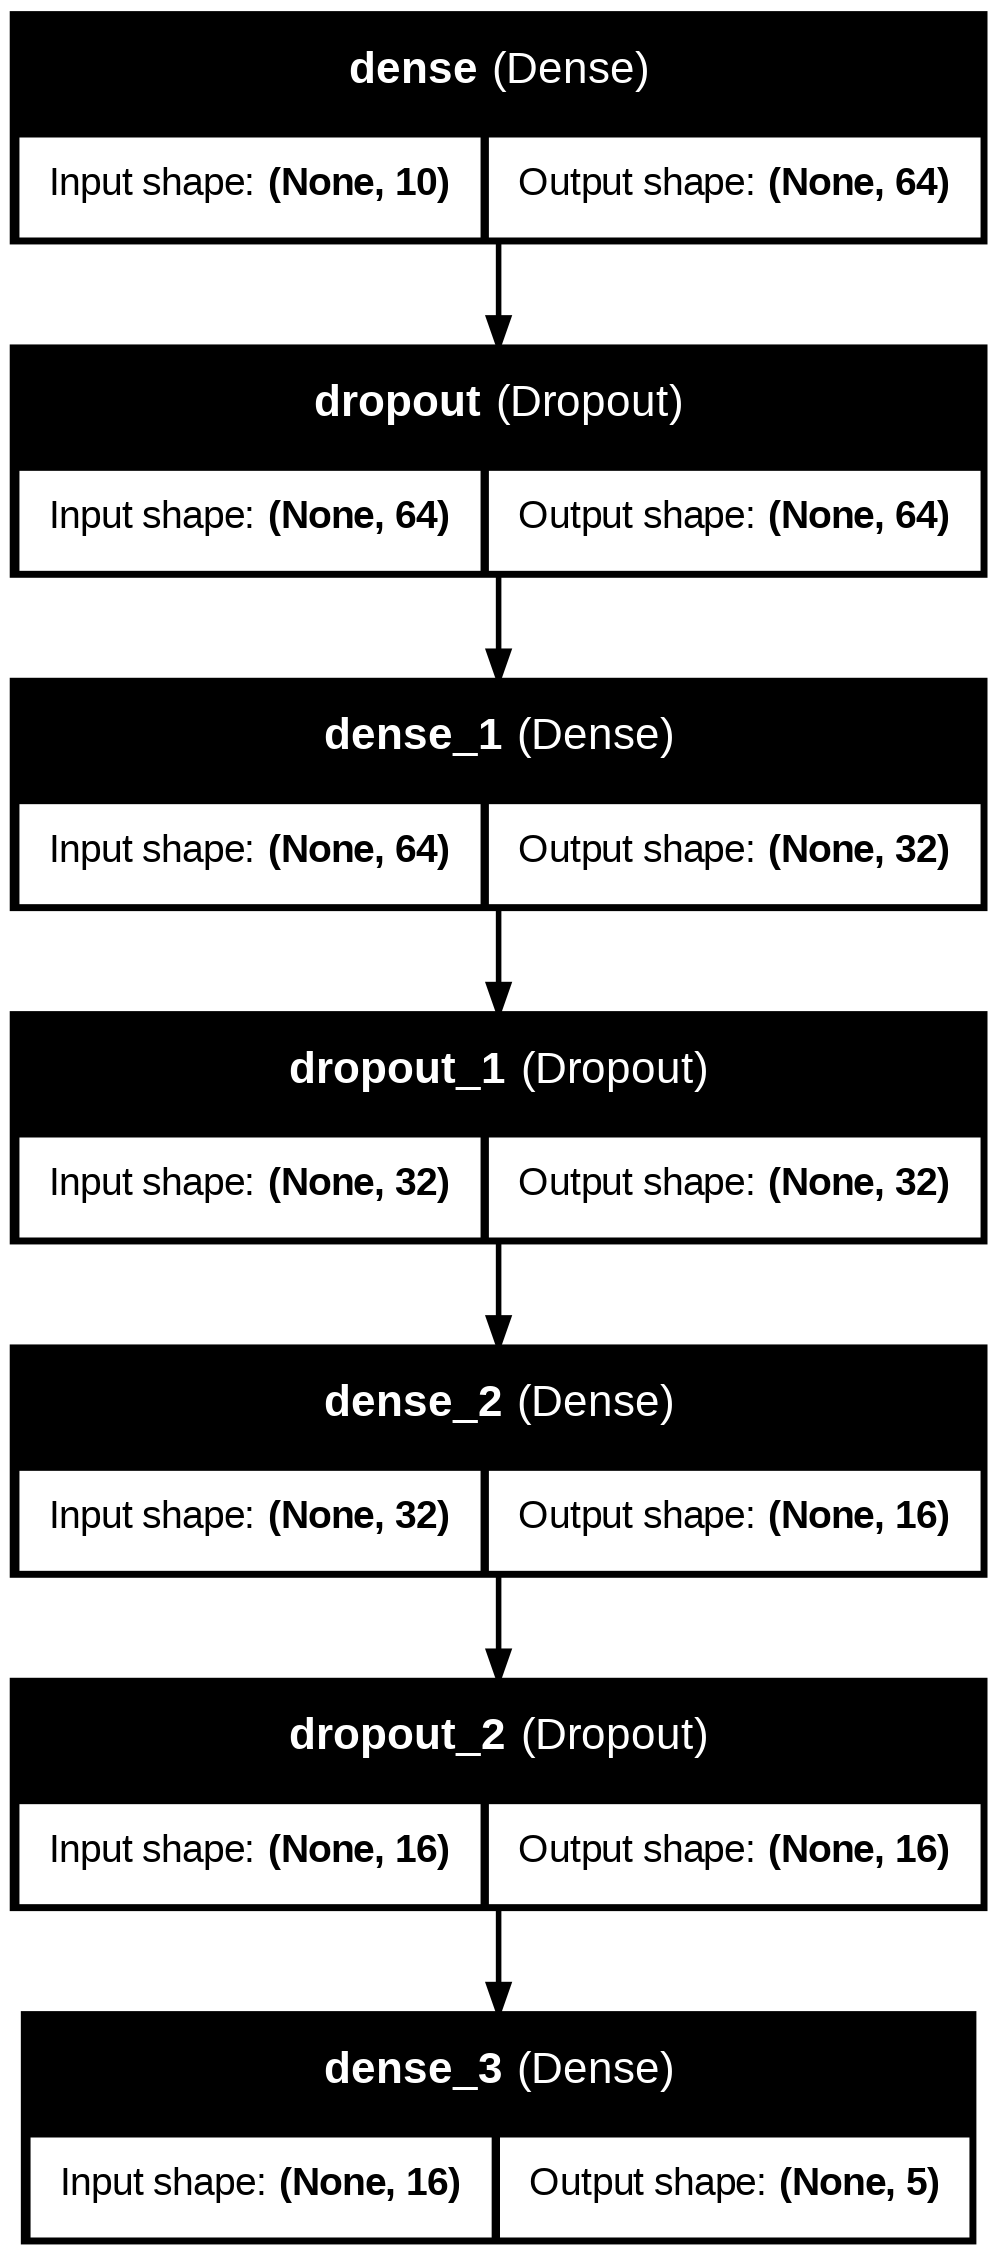

In [ ]:
from tensorflow.keras.utils import plot_model

# Save and plot the model architecture
plot_model(updated_mlp_model, to_file="mlp_model_structure.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("mlp_model_structure.png")


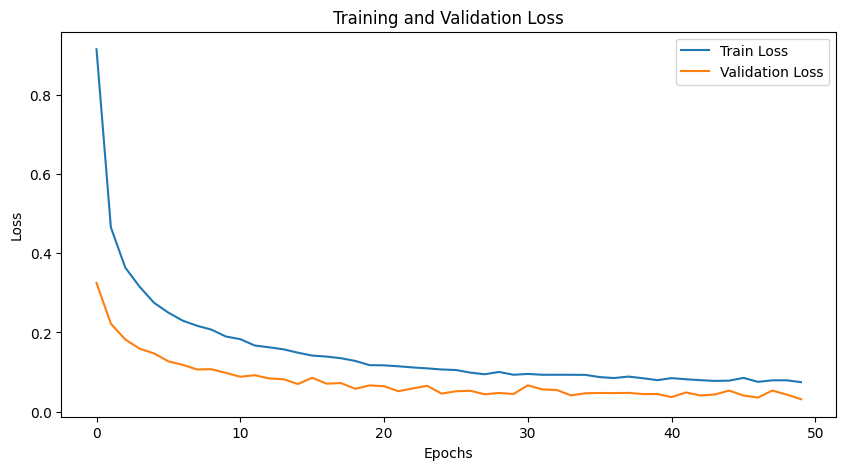

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss using the correct history object
plt.figure(figsize=(10, 5))
plt.plot(history_updated.history['loss'], label='Train Loss')
plt.plot(history_updated.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


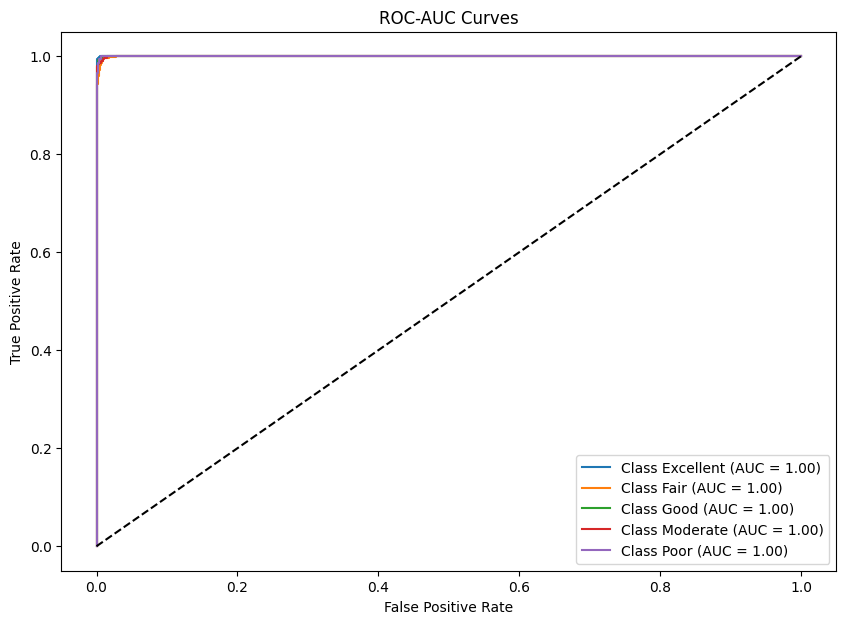

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Get model predictions
y_pred_prob = updated_mlp_model.predict(X_test_scaled)

# Plot ROC curves for each class
plt.figure(figsize=(10, 7))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend()
plt.show()


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


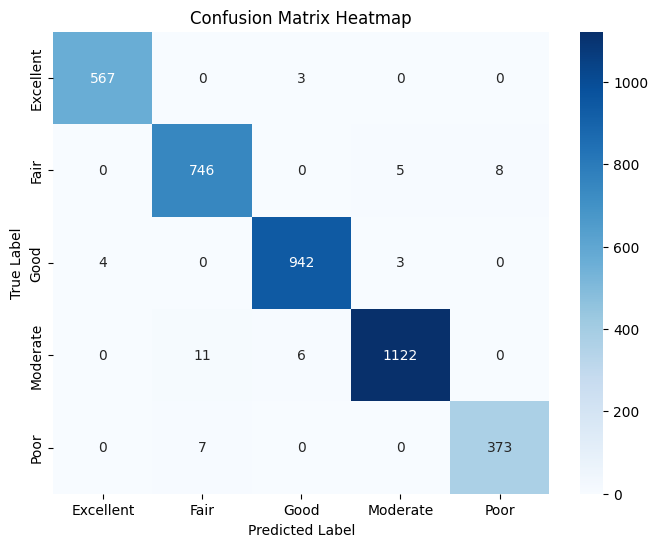

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
y_pred = updated_mlp_model.predict(X_test_scaled).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
updated_mlp_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,193 (39.82 KB)

 Trainable params: 3,397 (13.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,796 (26.55 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

def compute_approx_flops(model):
    """Compute approximate FLOPs for a Keras model."""
    total_params = model.count_params()  # Total number of trainable parameters
    return total_params * 2  # Each parameter is used in a multiplication and addition

# Compute FLOPs for your MLP model
flops_mlp = compute_approx_flops(updated_mlp_model)
print(f"Approximate FLOPs: {flops_mlp:,}")


Approximate FLOPs: 6,794


In [ ]:
print(df["Soil_Quality"].value_counts())


Soil_Quality
Moderate     5695
Good         4746
Fair         3796
Excellent    2848
Poor         1899
Name: count, dtype: int64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

# ---------------- Load and Preprocess Data ----------------
# Upload the file manually
uploaded = files.upload()

# Load dataset
df = pd.read_csv("CleanedSoilDataset_With_RefinedSoilQuality.csv")

# Encode categorical target column
label_encoder = LabelEncoder()
df['Soil_Quality'] = label_encoder.fit_transform(df['Soil_Quality'])

# Define features (X) and target (y)
X = df.drop(columns=['Soil_Quality'])
y = df['Soil_Quality']

# Feature Selection using Recursive Feature Elimination (RFE)
feature_selector = RFE(ExtraTreesClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
X_selected = feature_selector.fit_transform(X, y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# ---------------- Train and Evaluate Models Separately ----------------
# Function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

# Define individual models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42),
    'LGBM': LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=200, max_depth=20, random_state=42),
    'SVC': SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model separately
for name, model in models.items():
    print(f"Training {name} model...")
    train_and_evaluate(model, X_train, X_test, y_train, y_test)
    print("-" * 50)


Saving CleanedSoilDataset_With_RefinedSoilQuality.csv to CleanedSoilDataset_With_RefinedSoilQuality.csv
Training RandomForest model...
RandomForestClassifier Accuracy: 0.9638
--------------------------------------------------
Training LGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2408
[LightGBM] [Info] Number of data points in the train set: 22780, number of used features: 10
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier Accuracy: 0.9731
--------------------------------------------------
Training ExtraTrees model...
ExtraTreesClassifier Accuracy: 0.9658
--------------------------------------------------
Training SVC model...
SVC Accuracy: 0.9738
--------------------------------------------------
Training KNN model...
KNeighborsClassifier Accuracy: 0.9380
--------------------------------------------------
